<a href="https://colab.research.google.com/github/ash0603ANS128/Plantae/blob/main/ANS128_BodyFat_Prediction_FInal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
simonezappatini_body_fat_extended_dataset_path = kagglehub.dataset_download('simonezappatini/body-fat-extended-dataset')



100%|██████████| 11.5k/11.5k [00:00<00:00, 5.71MB/s]

Extracting files...


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn # visualize missing values

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge



import warnings

from sklearn.exceptions import DataConversionWarning, ConvergenceWarning

# DataConversionWarning: This warning is related to data type conversions in scikit-learn.
# It can occur when the library encounters unexpected data types and needs to convert them.
warnings.filterwarnings("ignore", category=DataConversionWarning)

# ConvergenceWarning: This warning is related to optimization algorithms not converging.
# It may occur when the optimization algorithm does not reach a stable point during training.
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data exploration and understanding

In [ ]:
df = pd.read_csv(filepath_or_buffer='/content/BodyFat - Extended (1).csv')
df.info()
df.head(n=5) # equal to df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BodyFat   436 non-null    float64
 1   Original  436 non-null    object 
 2   Sex       436 non-null    object 
 3   Age       436 non-null    int64  
 4   Weight    436 non-null    float64
 5   Height    436 non-null    float64
 6   Neck      436 non-null    float64
 7   Chest     436 non-null    float64
 8   Abdomen   436 non-null    float64
 9   Hip       436 non-null    float64
 10  Thigh     436 non-null    float64
 11  Knee      436 non-null    float64
 12  Ankle     436 non-null    float64
 13  Biceps    436 non-null    float64
 14  Forearm   436 non-null    float64
 15  Wrist     436 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 54.6+ KB


,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
BodyFat,436.0,20.249839,7.502125,0.0000,15.02250,20.5000,25.410,47.50
Age,436.0,34.545872,15.500099,1.0000,21.00000,28.5000,46.000,81.00
Weight,436.0,72.282203,15.464366,42.1848,59.87520,70.8158,81.560,164.72
Height,436.0,1.734048,0.098359,0.7500,1.66878,1.7300,1.800,1.97
Neck,436.0,35.250917,3.837908,26.0000,31.50000,35.4500,38.300,51.20
Chest,436.0,94.158028,10.931688,43.0000,85.50000,93.0500,101.425,136.20
Abdomen,436.0,82.816055,14.652729,58.0000,70.00000,82.8500,93.225,148.10
Hip,436.0,98.652294,6.895034,82.5000,94.00000,98.3000,102.500,147.70
Thigh,436.0,56.039679,6.194143,38.0000,51.50000,56.0000,60.000,87.30
Knee,436.0,37.365596,2.768403,24.7000,35.40000,37.5000,39.000,49.10


## Missing Values

BodyFat     0
Original    0
Sex         0
Age         0
Weight      0
Height      0
Neck        0
Chest       0
Abdomen     0
Hip         0
Thigh       0
Knee        0
Ankle       0
Biceps      0
Forearm     0
Wrist       0
dtype: int64


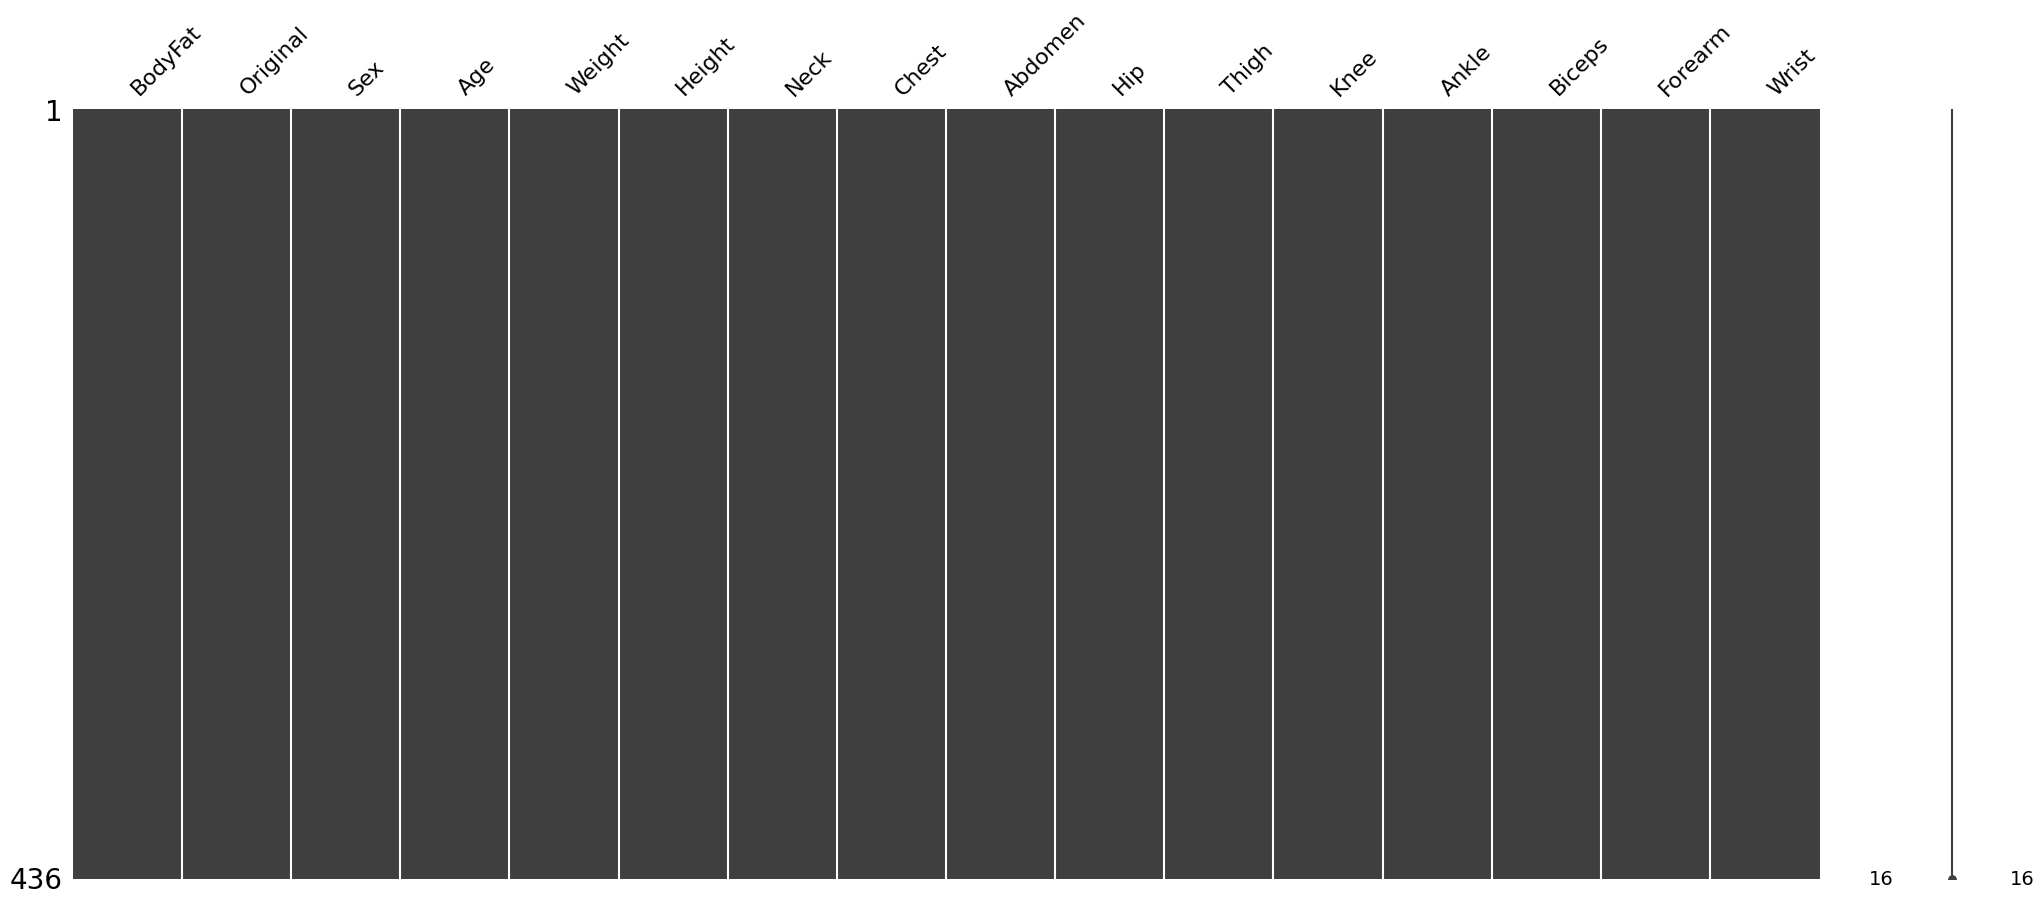

In [ ]:
# Checking missing values.
print(df.isna().sum())

msn.matrix(df);

There are no missing values.

## Outliers

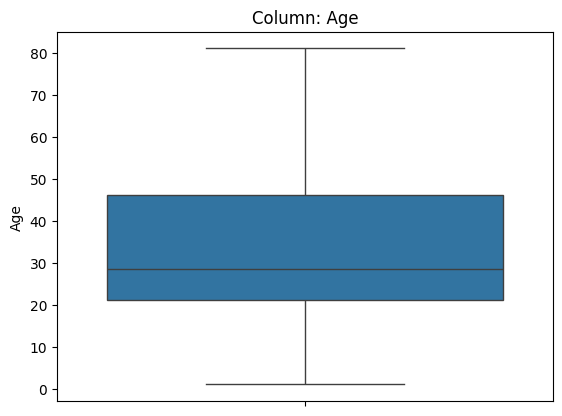

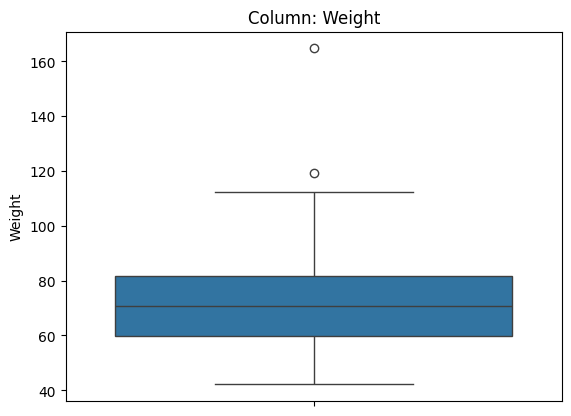

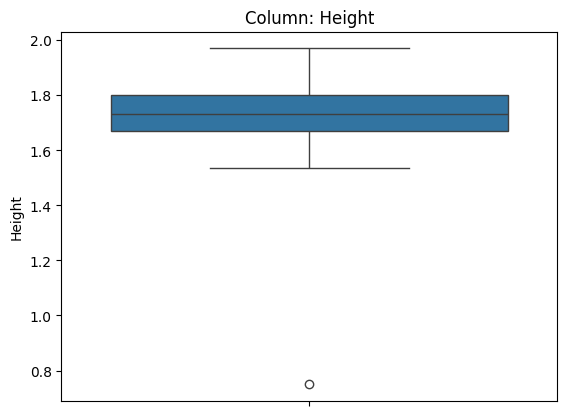

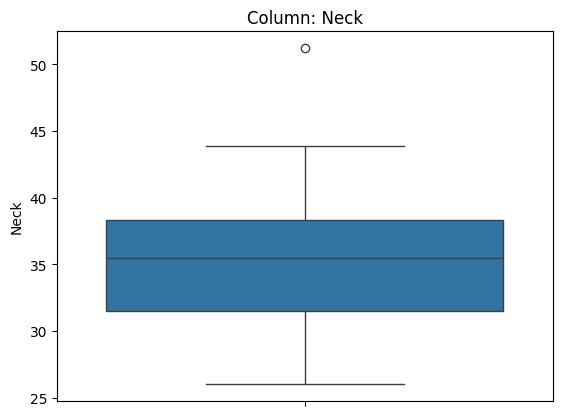

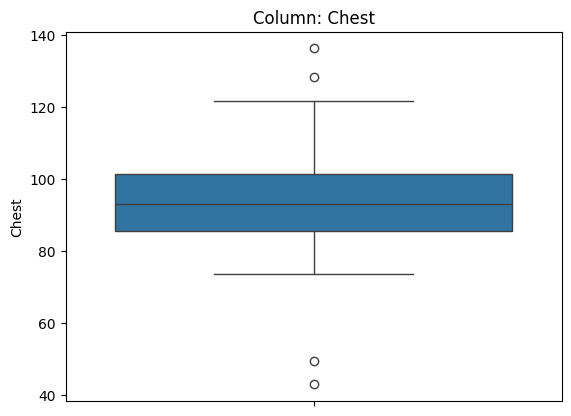

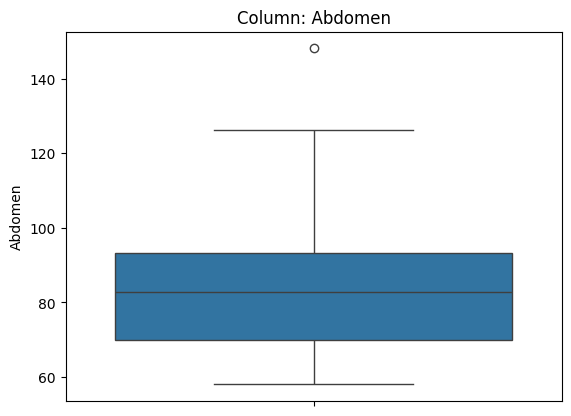

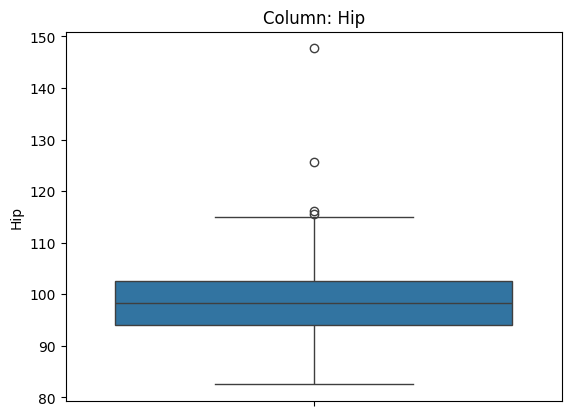

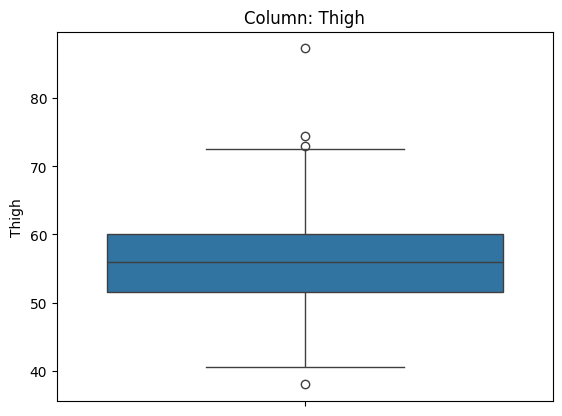

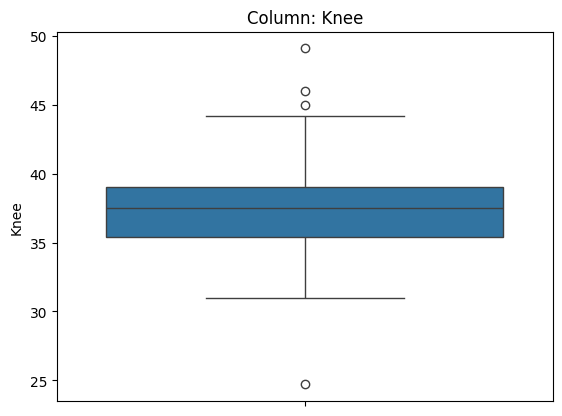

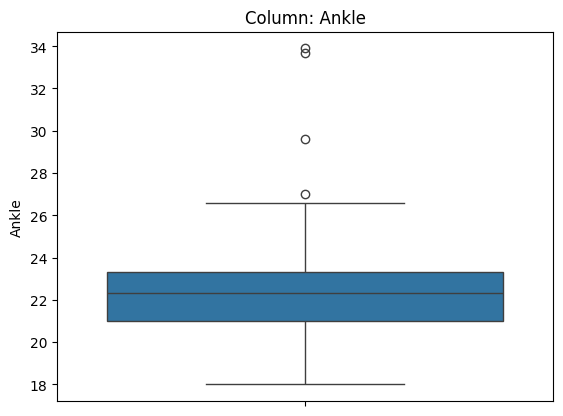

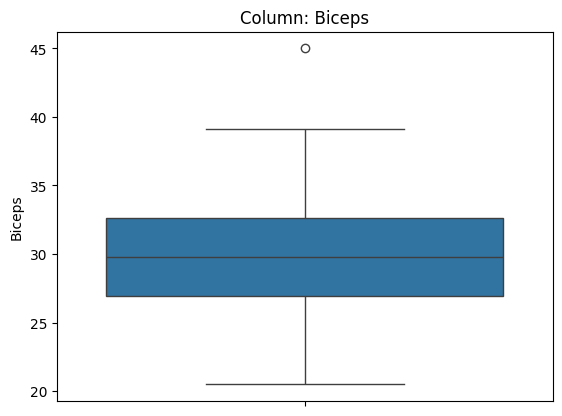

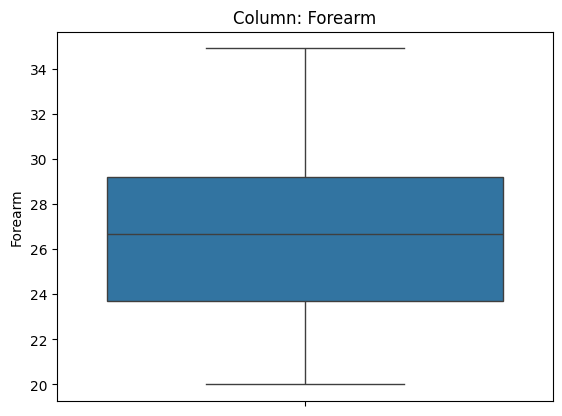

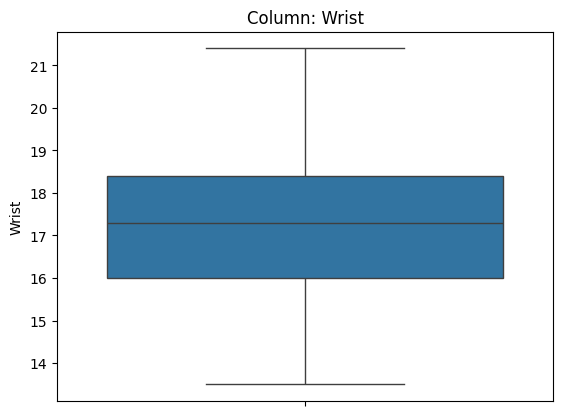

In [ ]:
# Handling outliers.
def visualize_outliers(data, target_c): # This function that takes two parameters: data (a DataFrame) and target_c (the target/dependent column to drop from the visualization).
    data = data.drop(target_c, axis=1) # This line drops the specified target column (target_c) from the DataFrame (data). This is done to avoid visualizing the boxplot for the target column itself.
    for c in data.columns: # Inside the loop, it checks if the data type of the column is either 'int' or 'float'. If it is, a boxplot is created using sns.boxplot(data[c]).
        if (data[c].dtype == 'int') or (data[c].dtype == 'float'):
            sns.boxplot(data[c]);
            plt.title(f'Column: {c}')
            plt.show()

visualize_outliers(data=df, target_c='BodyFat')

<ipython-input-8-2693a8fe0ab3>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '83.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[c] > upper_limit, c] = upper_limit


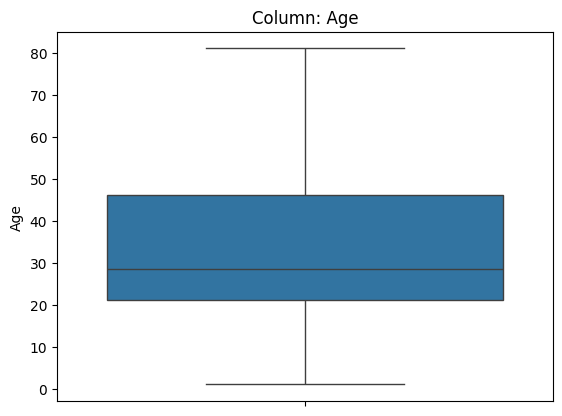

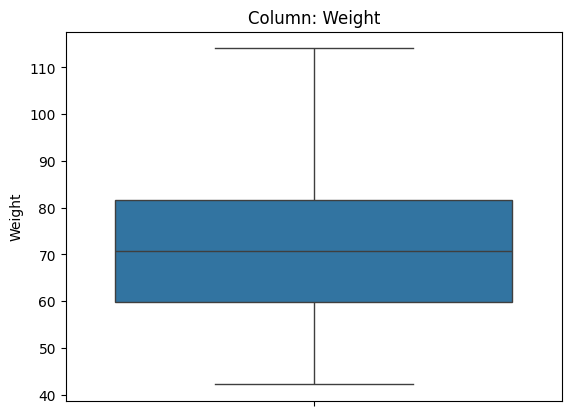

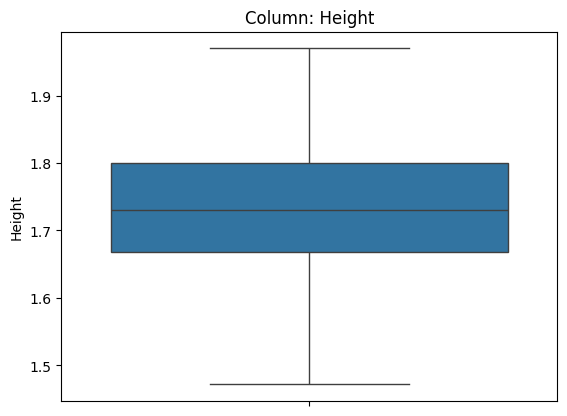

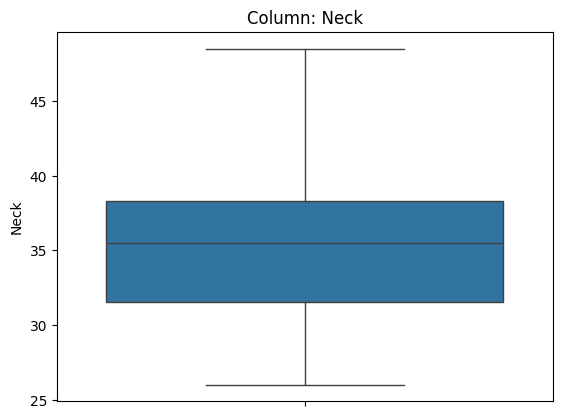

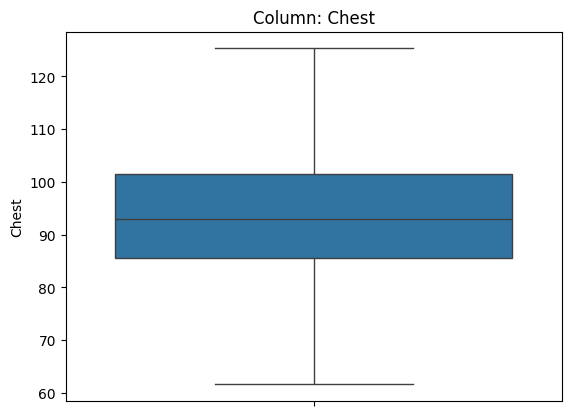

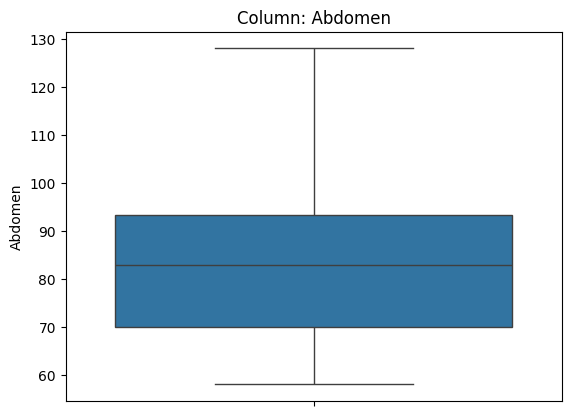

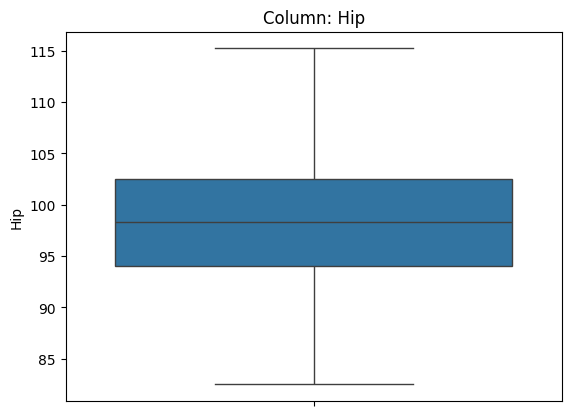

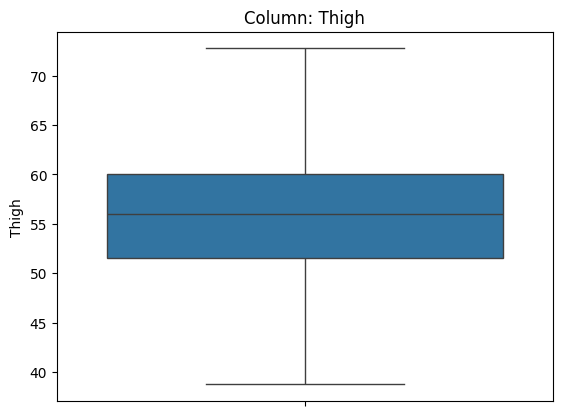

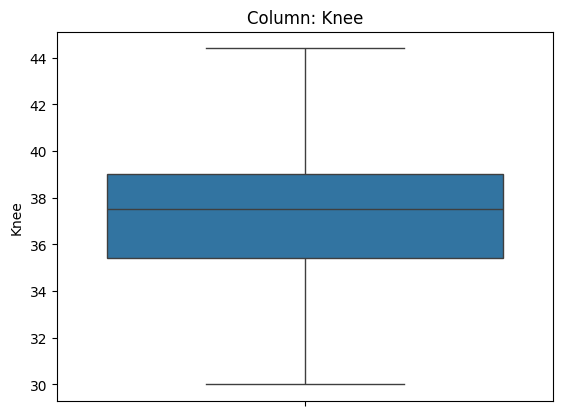

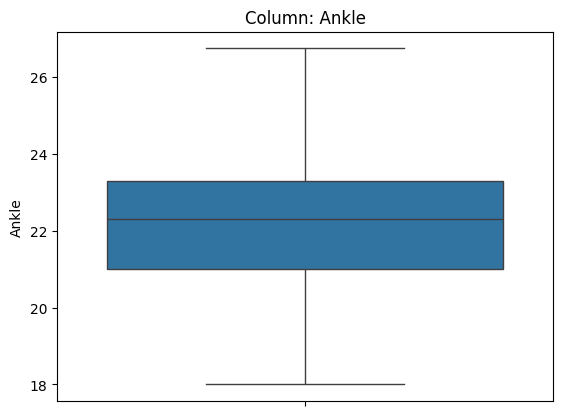

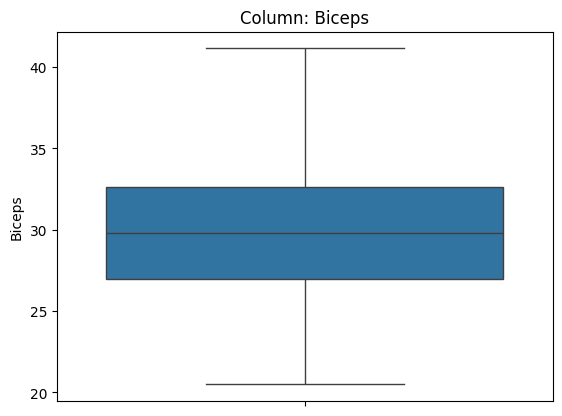

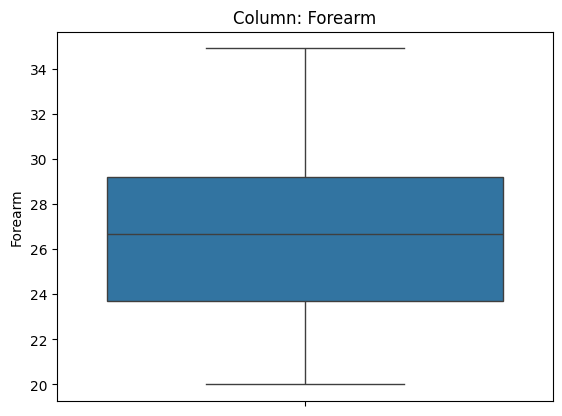

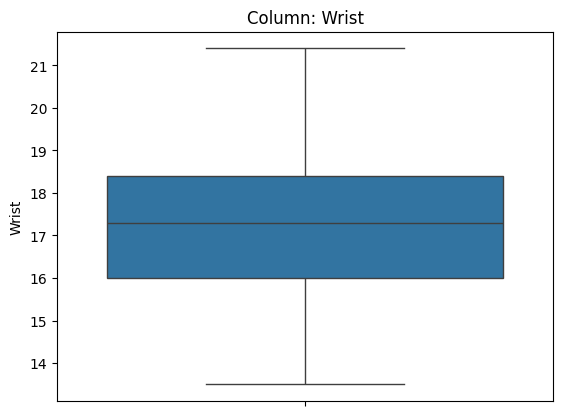

In [ ]:
# Handling outliers.
def handling_outliers(data, target_c, q1_p=0.25, q3_p=0.75):
    """
    Handle outliers in a DataFrame using the IQR method.

    Parameters:
    - data: DataFrame
    - target_c: str
        The target column to exclude from outlier handling.
    - q1_p: float, optional (default=0.25)
        The percentile for the first quartile (Q1).
    - q3_p: float, optional (default=0.75)
        The percentile for the third quartile (Q3).
    """
    for c in data.columns:
        # Check if the column is numeric and not the target column
        if ((data[c].dtype == 'int') or (data[c].dtype == 'float')) and (c != target_c):
            # Calculate Q1, Q3, and IQR
            Q1 = data[c].quantile(q1_p)
            Q3 = data[c].quantile(q3_p)
            IQR = Q3 - Q1

            # Calculate upper and lower limits
            upper_limit = Q3 + (IQR * 1.5)
            lower_limit = Q1 - (IQR * 1.5)

            # Handle outliers by capping and flooring values
            data.loc[data[c] > upper_limit, c] = upper_limit
            data.loc[data[c] < lower_limit, c] = lower_limit

    # Return the DataFrame after handling outliers
    return data

df = handling_outliers(data=df, target_c='BodyFat')
visualize_outliers(df, 'BodyFat')

#We want to replacing categorical variables to numerical (for 'original'and 'sex')


## Encoding

In [ ]:
#Replacing the categorical variables to numerical
encod_dict = {
    "N": 0,
    "Y": 1,
    "M": 1,
    "F": 0
}

# replace the categorical data to numerical in the DataFrame
df = df.replace(encod_dict)

df.head()

<ipython-input-9-a1684fcda91d>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(encod_dict)


,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,1,1,23.0,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,1,1,22.0,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,1,1,22.0,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,1,1,26.0,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,1,1,24.0,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


#We calcualte the BMI and insert the BMI into the dataset.

In [ ]:
#Inserting BMI columns to the dataset
Height_meter = (df['Height']).round(2)

Weight_Kg = (df['Weight']).round(2)

BMI_score = (Weight_Kg/Height_meter**2).round()
BMI = pd.DataFrame(BMI_score, columns=["BMI"])
df['BMI'] = BMI['BMI']

df.head()


,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,12.3,1,1,23.0,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,24.0
1,6.1,1,1,22.0,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.0
2,25.3,1,1,22.0,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.0
3,10.4,1,1,26.0,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,25.0
4,28.7,1,1,24.0,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,26.0


#We realized that there are datapoints that have a disparity between the bodyfat percentage and BMI values.

In [ ]:
print('underweightgroup & obesegroup')
#BMI below 18.5 indicates underweight but to be more accurate, the body fat percentage has to be below 18

#Females and males underweight group (underweight for both genders are BMI below 18.5 and bofyfat below 14)

underweight_df=df[df['BMI']<18.5]
underweight_df_sorted_filtered = underweight_df[underweight_df['BodyFat'] > 14]

#Females and males overweight group (overweight for both genders are BMI above 25 and bodyfat above 25)

overweight_df=df[(df['BMI']>25)]
overweight_df_sorted_filtered = overweight_df[overweight_df['BodyFat'] < 25]


display(underweight_df_sorted_filtered[['Sex','BMI', 'BodyFat']])
display(overweight_df_sorted_filtered[['Sex','BMI', 'BodyFat']])

#This shows that BMI has some disparity with the percentage of bodyfat that categorize as underweight and overweight
#There is a total of 61 +11 =72 data points that have inaccurate BMI


underweightgroup & obesegroup


,Sex,BMI,BodyFat
278,0,18.0,17.32
295,0,17.0,18.83
303,0,17.0,17.62
337,0,18.0,19.04
340,0,17.0,15.03
350,0,18.0,14.70
351,0,18.0,19.93
367,0,17.0,18.98
404,0,17.0,25.02
407,0,18.0,21.20


,Sex,BMI,BodyFat
5,1,26.0,20.90
6,1,26.0,19.20
9,1,26.0,11.70
11,1,26.0,7.80
12,1,26.0,20.80
...,...,...,...
224,1,27.0,10.90
226,1,26.0,14.80
235,1,26.0,18.60
236,1,26.0,24.80



#There is a total of 61 +11 =72 data points that have inaccurate BMI compared to their bodyfat percentage.
#We'll use a scatterplot so it's clearer

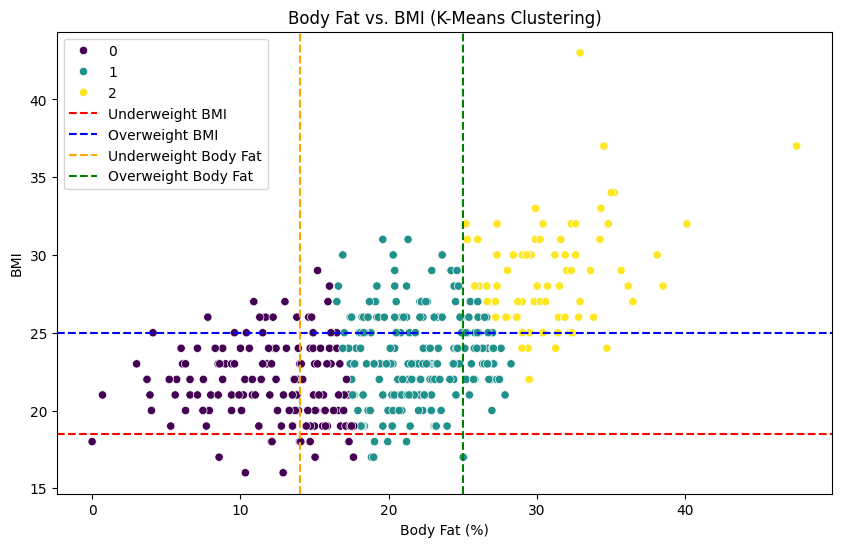

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame with 'BMI' and 'BodyFat' columns

# 1. Feature Selection
X = df[['BMI', 'BodyFat']]

# 2. Applying K-Means with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# 3. Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BodyFat', y='BMI', hue='Cluster', palette='viridis')
plt.axhline(18.5, color='red', linestyle='--', label='Underweight BMI')
plt.axhline(25, color='blue', linestyle='--', label='Overweight BMI')
plt.axvline(14, color='orange', linestyle='--', label='Underweight Body Fat')
plt.axvline(25, color='green', linestyle='--', label='Overweight Body Fat')
plt.legend()
plt.title('Body Fat vs. BMI (K-Means Clustering)')
plt.xlabel('Body Fat (%)')
plt.ylabel('BMI')
plt.show()

##This purple dots are the ones that have a disparity between the BMI values and Bodyfat percentage values

#We want to see if we use the variables in our dataset, if we can find another model equation to calculate bodyfat percentage


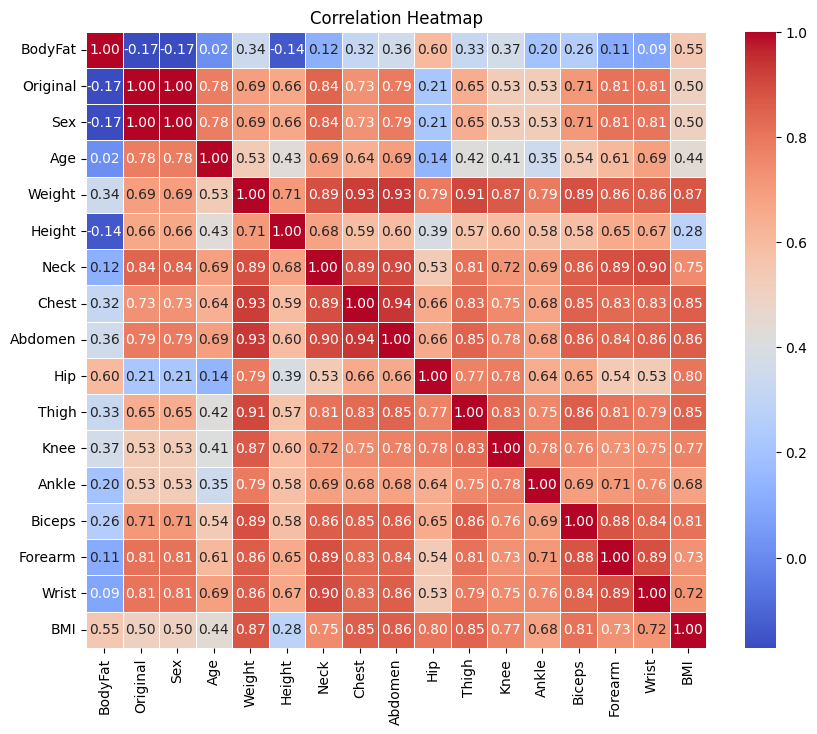

In [ ]:
#find which variables are the most correlated to body fat percentage

#Replacing the categorical variables to numerical
encod_dict = {
    "N": 0,
    "Y": 1,
    "M": 1,
    "F": 0
}

df = df.replace(encod_dict)
#Removing the last column "Category" because it is not numerical
df=df.drop('Category', axis=1)

corr_matrix = df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



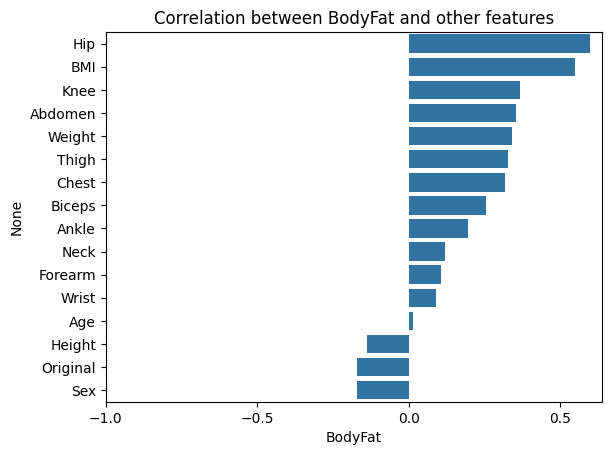

In [ ]:
#Using a barplot to show the most correlated variables
encod_dict = {
    "N": 0,
    "Y": 1,
    "M": 1,
    "F": 0
}

df = df.replace(encod_dict)


corr = df.corr()
corr = corr.BodyFat
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr,y=cr.index)
plt.xticks(np.arange(-1,1,.5))
plt.title('Correlation between BodyFat and other features')
plt.show()

#The three most correlated variables are "hip","knee", and "abdomen"

#From the heatmap and the barplot, we pick the three most correlated variables to do a regression model.


In [ ]:
#Since we know BMI is somewhat inaccurate, we want to use our dataset to find another way


X = df[['Hip', 'Knee', 'Abdomen']]
y = df['BodyFat']
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2)", r2)


Coefficients: [ 0.930495   -0.89346946  0.03874588]
Intercept: -41.27719724375874
Mean Squared Error (MSE): 32.496548955682826
Root Mean Squared Error (RMSE): 5.700574440850924
R-squared (R^2) 0.2977274240809725


#We tried using more variables to see if it makes the model more accurate and it does.

In [ ]:
X = df[['Hip', 'Knee', 'Abdomen', 'Weight','Thigh','Chest']]
y = df['BodyFat']
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2)", r2)

Coefficients: [ 1.25988982  0.02360887  0.43048079 -0.57887991 -0.32076865  0.07244835]
Intercept: -87.51870482688095
Mean Squared Error (MSE): 26.18406578129136
Root Mean Squared Error (RMSE): 5.117036816487777
R-squared (R^2) 0.4341444887166984


#r^2 compared: 0.4373>0.2861

[0.47185514 0.11789835 0.41024651]
Mean Squared Error (MSE): 26.137782524545447
Root Mean Squared Error (RMSE): 5.112512349573882
R-squared (R^2) 0.43514470144640094


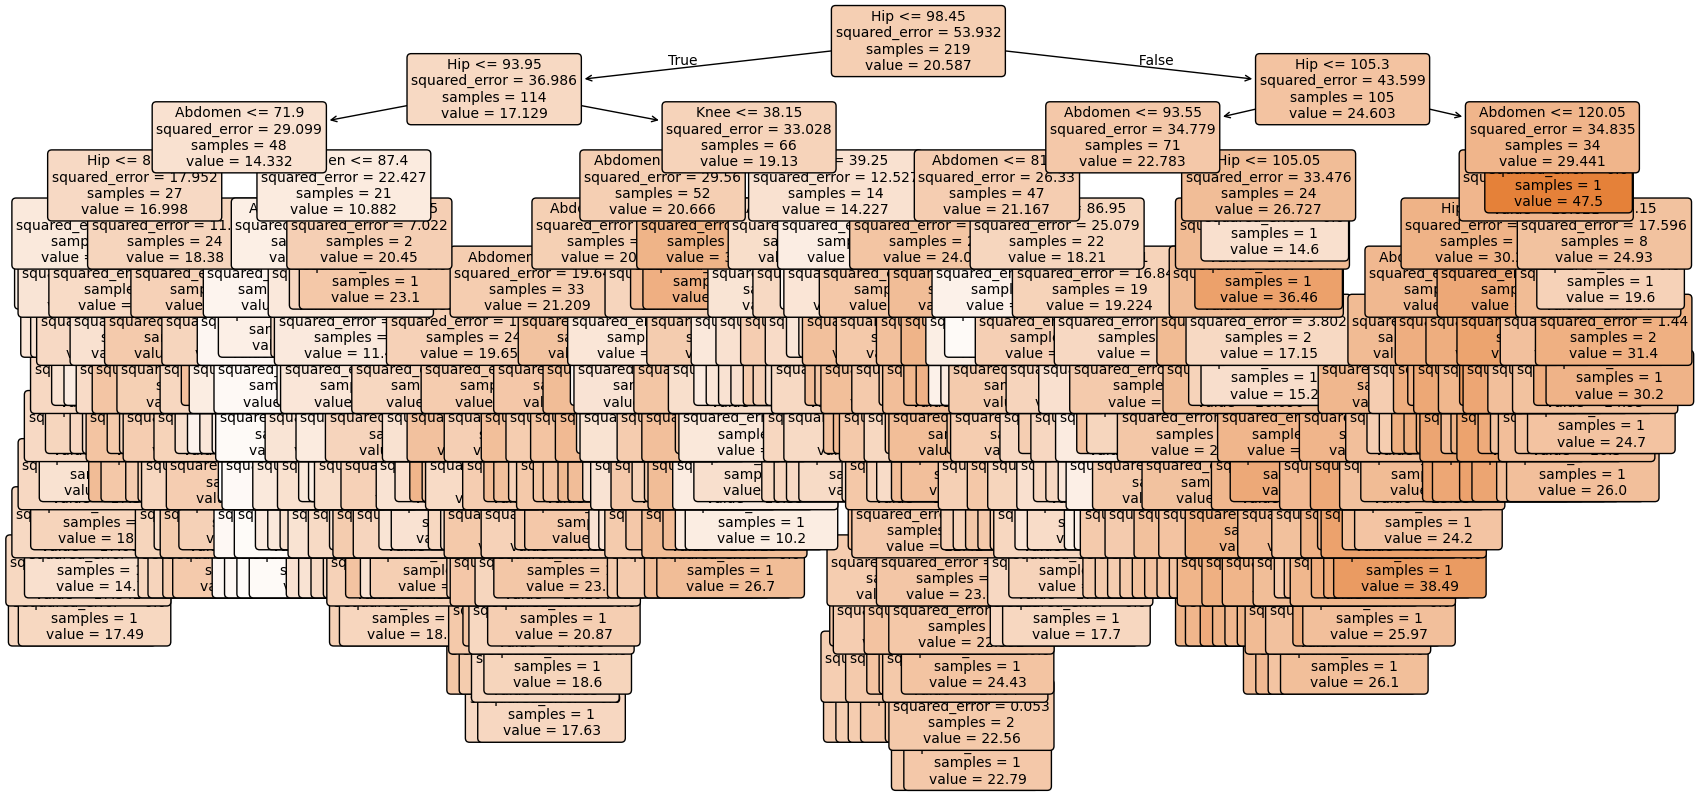

In [ ]:
#It is more accurate to input more varaibles but we will only pick the 3 most correlated
#We want to see if it is more accurate to use another regression model

X = df[['Hip', 'Knee', 'Abdomen']]
y = df['BodyFat']
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
print(model.feature_importances_)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2)", r2)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = model.estimators_[0]  # Get the first tree

plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names=X.columns,  # X is your feature dataframe
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()


In [ ]:
X = df[['Hip', 'Knee', 'Abdomen']]
y = df['BodyFat']
from sklearn.svm import SVR
model = SVR()
model.fit(X, y)
print(model.support_vectors_)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Split data into training and testing sets

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2)", r2)


[[94.5 37.3 85.2]
 [98.7 37.3 83. ]
 [99.2 38.9 87.9]
 ...
 [90.  32.  61.5]
 [88.  32.  64. ]
 [86.6 33.5 63. ]]
Mean Squared Error (MSE): 34.44167322033264
Root Mean Squared Error (RMSE): 5.8687028567079995
R-squared (R^2) 0.2556919627253338


#Comparing the 4 models (linear regression, random forest regressor, support and vector regression)
#The most accurate model is the random forrest regressor model.